In [160]:
# preamble imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statistics

# Assignment 1 - Descriptive Statistics

#### Patrick Pfenning
#### 01/11/23

Basic Python
---

In [48]:
"""Using the statistics module"""
# Set data
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
# Find mean
statistics.mean(data)

3

In [49]:
# Find median
statistics.median(data)

3.0

In [50]:
# Find mode
statistics.mode(data)

4

In [51]:
# Summarize data
from dataclasses import dataclass, field

"""Python 3.10 has no describe function, so I made my own class to do the same."""

@dataclass
class DescribeResults:
    """Class for describing data"""
    data: list = field(repr=False, default_factory=list)
    # initialize calculations
    mean: float = field(init=False)
    median: float = field(init=False)
    mode: float = field(init=False)
    variance: float = field(init=False)
    stdev: float = field(init=False)
    minmax: tuple = field(init=False)
    sum: float = field(init=False)

    def __post_init__(self):
        """Set Calculations"""
        self.mean = statistics.mean(self.data)
        self.median = statistics.median(self.data)
        self.mode = statistics.mode(self.data)
        self.variance = statistics.variance(self.data)
        self.stdev = statistics.stdev(self.data)
        self.minmax = (min(data), max(data))
        self.sum = sum(data)

DescribeResults(data)

DescribeResults(mean=3, median=3.0, mode=4, variance=1.1111111111111112, stdev=1.0540925533894598, minmax=(1, 4), sum=30)

In [52]:
"""Using the numpy module"""
# mean
np.mean(data)

3.0

In [53]:
# median
np.median(data)

3.0

In [54]:
# std. deviation
np.std(data)

1.0

Data Preparation
---

Before telling our story, we must first clean our data.

In [79]:
# get data
df = pd.read_csv('../data/wine.csv').set_index('unique_id', drop=True)
# transpose for better visibility
df.T.iloc[:, :5]

unique_id,593,617,782,990,822
class,1.00,1.00,1.00,1.00,1.00
alcohol_percentage,14.23,13.20,13.16,14.37,13.24
malic_acid,1.71,1.78,2.36,1.95,2.59
ash,2.43,2.14,2.67,2.50,2.87
alcalinity,15.60,11.20,18.60,16.80,21.00
magnesium,127.00,100.00,101.00,113.00,118.00
phenols,2.80,2.65,2.80,3.85,2.80
flavanoids,3.06,2.76,3.24,3.49,2.69
nonflavanoids,0.28,0.26,0.30,0.24,0.39
proanthocyanins,2.29,1.28,2.81,2.18,1.82


In [81]:
# standardization (maps quantitative values to a bell curve with mean 0)
df_norm = df.iloc[:, 1:].copy()
df_norm = (df_norm-df_norm.mean())/df_norm.std()
df_norm['class'] = df['class']
df_norm = df_norm[df.columns]
df_norm.T.iloc[:, :5]

unique_id,593,617,782,990,822
class,1.000000,1.000000,1.000000,1.000000,1.000000
alcohol_percentage,1.514341,0.245597,0.196325,1.686791,0.294868
malic_acid,-0.560668,-0.498009,0.021172,-0.345835,0.227053
ash,0.231400,-0.825667,1.106214,0.486554,1.835226
alcalinity,-1.166303,-2.483841,-0.267982,-0.806975,0.450674
magnesium,1.908522,0.018094,0.088110,0.928300,1.278379
phenols,0.806722,0.567048,0.806722,2.484437,0.806722
flavanoids,1.031908,0.731565,1.212114,1.462399,0.661485
nonflavanoids,-0.657708,-0.818411,-0.497005,-0.979113,0.226158
proanthocyanins,1.221438,-0.543189,2.129959,1.029251,0.400275


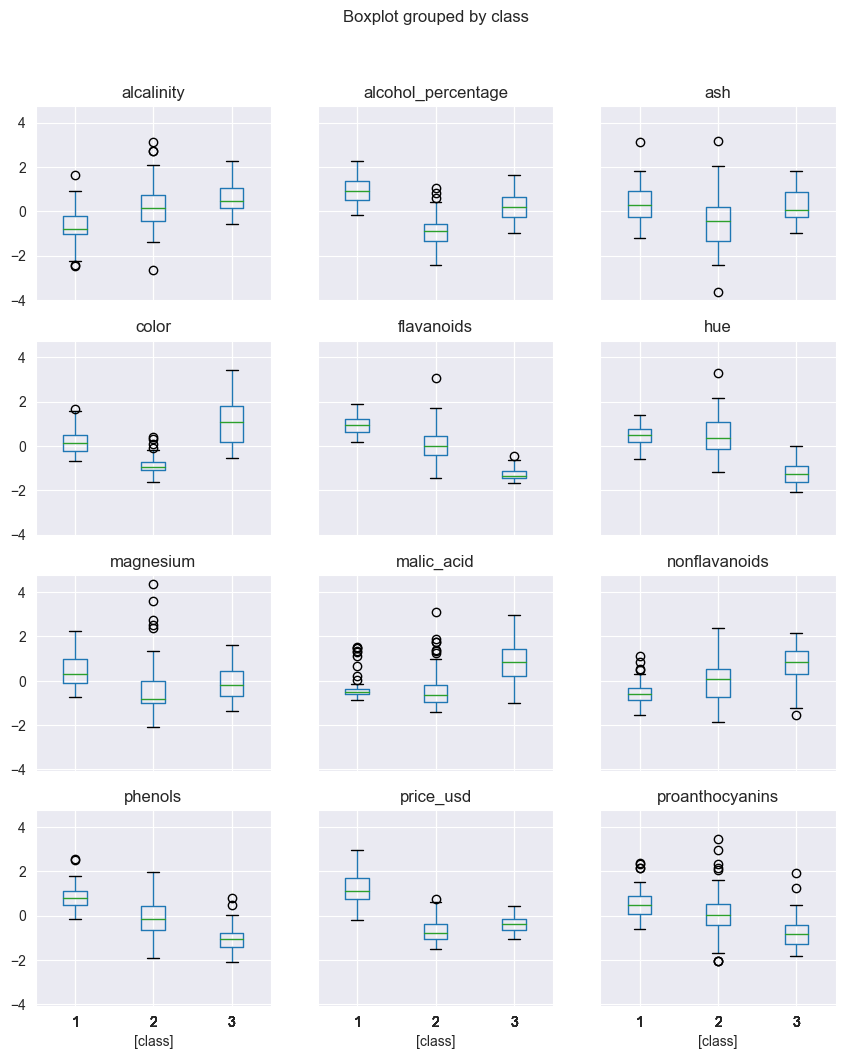

In [166]:
"""Boxplot of Standardized Data by Class"""
df_norm.boxplot(by='class', layout=(4, 3), figsize=(10, 12))
plt.show()

In [167]:
"""Describe each measure by classification"""
grp = df.groupby('class').describe().T.reset_index(names=['feature', 'measure'])
desc = {k:v.drop(columns='feature').set_index('measure',drop=True) for k,v in grp.groupby('feature')}
desc

{'alcalinity': class            1          2          3
 measure                                 
 count    59.000000  71.000000  48.000000
 mean     17.037288  20.238028  21.416667
 std       2.546322   3.349770   2.258161
 min      11.200000  10.600000  17.500000
 25%      16.000000  18.000000  20.000000
 50%      16.800000  20.000000  21.000000
 75%      18.700000  22.000000  23.000000
 max      25.000000  30.000000  27.000000,
 'alcohol_percentage': class            1          2          3
 measure                                 
 count    59.000000  71.000000  48.000000
 mean     13.744746  12.278732  13.153750
 std       0.462125   0.537964   0.530241
 min      12.850000  11.030000  12.200000
 25%      13.400000  11.915000  12.805000
 50%      13.750000  12.290000  13.165000
 75%      14.100000  12.515000  13.505000
 max      14.830000  13.860000  14.340000,
 'ash': class            1          2          3
 measure                                 
 count    59.000000  71.000000 